# **FEATURE MATCHING**

We'e talked about template matching, but it required an exact copy of the image. This isn't useful for real world applications.

Feature matching extracts defining key features from an input image (using ideas from corner, edge, and contour detection).

Then using a distance calculation, finds all the matches in a secondary image. This means we are no longer required to have an exact copy of the target image.

There are three methods to do this:
* Brute-Force matching with ORB descriptors
* Brute-Force matching with SIFT descriptors and Ratio test
* FLANN based matcher

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

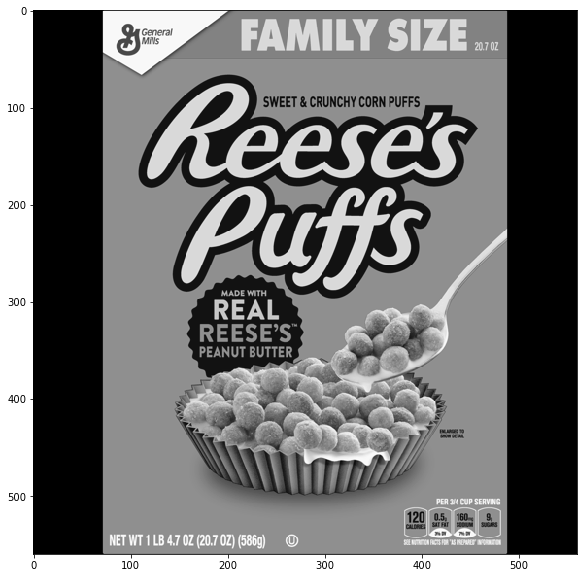

In [8]:
reeses = cv2.imread('../DATA/reeses_puffs.png', 0)
display(reeses)
# This is the image we'll try to find in the target image

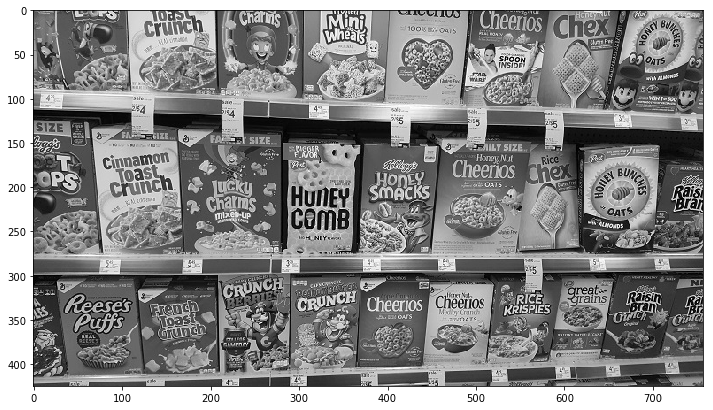

In [11]:
cereals = cv2.imread('../DATA/many_cereals.jpg', 0)
display(cereals)
# this image contains reese's puff's box
# we will try to identify reese's puff in the image

In [12]:
#calling brute force detection

orb = cv2.ORB_create() # we have created a detector object through which we can call multiple methods
kp1, des1 = orb.detectAndCompute(reeses, None)
kp2, des2 = orb.detectAndCompute(cereals, None)
# detectAndCompute returns two things, key points and descriptors

In [13]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

In [14]:
matches = bf.match(des1, des2)

In [15]:
matches
#these have multiple attributes. we need to get their distances

[<DMatch 000001CF86FEC710>,
 <DMatch 000001CF86FECE70>,
 <DMatch 000001CF86FECEF0>,
 <DMatch 000001CF86FECE10>,
 <DMatch 000001CF86FECED0>,
 <DMatch 000001CF86FECE90>,
 <DMatch 000001CF86FECEB0>,
 <DMatch 000001CF86FEC7F0>,
 <DMatch 000001CF86FECC50>,
 <DMatch 000001CF86FECF10>,
 <DMatch 000001CF86FECF30>,
 <DMatch 000001CF86FECF50>,
 <DMatch 000001CF86FECF70>,
 <DMatch 000001CF86FECF90>,
 <DMatch 000001CF86FECFB0>,
 <DMatch 000001CF86FECFD0>,
 <DMatch 000001CF86FFF030>,
 <DMatch 000001CF86FFF050>,
 <DMatch 000001CF86FFF070>,
 <DMatch 000001CF86FFF090>,
 <DMatch 000001CF86FFF0B0>,
 <DMatch 000001CF86FFF0D0>,
 <DMatch 000001CF86FFF0F0>,
 <DMatch 000001CF86FFF110>,
 <DMatch 000001CF86FFF130>,
 <DMatch 000001CF86FFF150>,
 <DMatch 000001CF86FFF170>,
 <DMatch 000001CF86FFF190>,
 <DMatch 000001CF86FFF1B0>,
 <DMatch 000001CF86FFF1D0>,
 <DMatch 000001CF86FFF1F0>,
 <DMatch 000001CF86FFF210>,
 <DMatch 000001CF86FFF230>,
 <DMatch 000001CF86FFF250>,
 <DMatch 000001CF86FFF270>,
 <DMatch 000001CF86F

In [16]:
matches = sorted(matches, key=lambda x:x.distance)

In [17]:
len(matches)

263

In [18]:
reeses_matches = cv2.drawMatches(reeses, kp1, cereals, kp2, matches[::25], None, flags=2)
# we are just accessing 25 matches out of 263

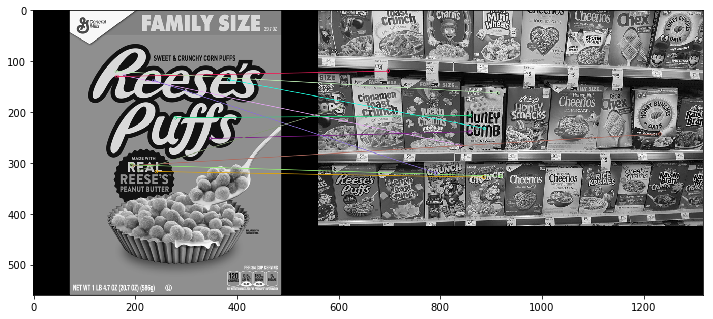

In [19]:
display(reeses_matches)

**Conclusion:** Brute Force matching doesn't really work